In [1]:
%cd ..

/home/mahdigilany/offline_codes/codes/TRUSnet


In [3]:
%env DATA=/home/mahdigilany/projects_data

from torchvision.datasets import CIFAR10
from src.utils.datamodule.dataloding import data_dir
from torchvision import transforms

data_dir("cifar10")

normalize = transforms.Normalize(
    mean=[0.4914, 0.4822, 0.4465],
    std=[0.2023, 0.1994, 0.2010],
)

transform = transforms.Compose([
    transforms.ToTensor(),
    normalize,
    ])

train_dataset = CIFAR10(root = data_dir("cifar10"), train=True, download=True, transform=transform)
test_dataset = CIFAR10(root = data_dir("cifar10"), train=False, download=True, transform=transform)

env: DATA=/home/mahdigilany/projects_data
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<class 'torchvision.datasets.cifar.CIFAR10'>
torch.Size([3, 32, 32])


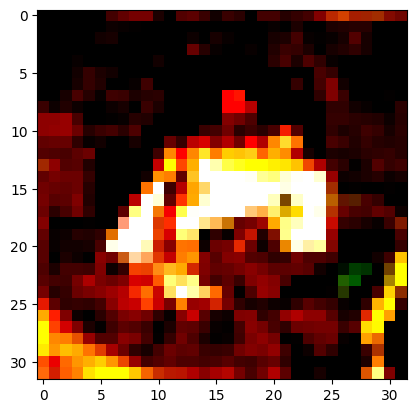

In [6]:
import matplotlib.pyplot as plt

image = next(iter(train_dataset))
print(type(train_dataset))
print(image[0].shape)

# make image in imshow smaller to see the image
plt.imshow(image[0].permute(1,2,0),)


In [8]:
# train_dataset.__dict__
from sklearn.model_selection import train_test_split

train_indx, val_indx = train_test_split(range(len(train_dataset)), test_size=0.2, random_state=0)

In [9]:
len(train_indx)

from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler

# train_sampler = SubsetRandomSampler(train_indx)
# val_sampler = SubsetRandomSampler(val_indx)

train_loader = DataLoader(train_dataset, batch_size=64, sampler=train_indx)

In [ ]:
next(iter(train_loader))

[tensor([[[[-1.7700e+00, -1.7118e+00, -1.5761e+00,  ..., -1.2272e+00,
            -1.4211e+00, -1.5567e+00],
           [-1.7506e+00, -1.7700e+00, -1.7700e+00,  ..., -1.3047e+00,
            -1.4598e+00, -1.5180e+00],
           [-1.7700e+00, -1.7894e+00, -1.7894e+00,  ..., -1.1497e+00,
            -1.4404e+00, -1.4017e+00],
           ...,
           [-1.8087e+00, -1.8087e+00, -1.7894e+00,  ..., -1.6343e+00,
            -1.7700e+00, -1.7312e+00],
           [-1.7894e+00, -1.8087e+00, -1.7700e+00,  ..., -1.7118e+00,
            -1.8087e+00, -1.8475e+00],
           [-1.7118e+00, -1.7118e+00, -1.7118e+00,  ..., -1.4792e+00,
            -1.5180e+00, -1.3047e+00]],
 
          [[-1.7102e+00, -1.6906e+00, -1.5529e+00,  ..., -9.8258e-01,
            -1.1792e+00, -1.2972e+00],
           [-1.7299e+00, -1.7496e+00, -1.7692e+00,  ..., -1.0612e+00,
            -1.2382e+00, -1.2776e+00],
           [-1.7692e+00, -1.7889e+00, -1.7889e+00,  ..., -9.0391e-01,
            -1.1989e+00, -1.1596e+00],


In [1]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
import timm

timm.list_models("vit*")

['vit_base_patch8_224',
 'vit_base_patch8_224_dino',
 'vit_base_patch8_224_in21k',
 'vit_base_patch16_18x2_224',
 'vit_base_patch16_224',
 'vit_base_patch16_224_dino',
 'vit_base_patch16_224_in21k',
 'vit_base_patch16_224_miil',
 'vit_base_patch16_224_miil_in21k',
 'vit_base_patch16_224_sam',
 'vit_base_patch16_384',
 'vit_base_patch16_plus_240',
 'vit_base_patch16_rpn_224',
 'vit_base_patch32_224',
 'vit_base_patch32_224_clip_laion2b',
 'vit_base_patch32_224_in21k',
 'vit_base_patch32_224_sam',
 'vit_base_patch32_384',
 'vit_base_patch32_plus_256',
 'vit_base_r26_s32_224',
 'vit_base_r50_s16_224',
 'vit_base_r50_s16_224_in21k',
 'vit_base_r50_s16_384',
 'vit_base_resnet26d_224',
 'vit_base_resnet50_224_in21k',
 'vit_base_resnet50_384',
 'vit_base_resnet50d_224',
 'vit_giant_patch14_224',
 'vit_giant_patch14_224_clip_laion2b',
 'vit_gigantic_patch14_224',
 'vit_huge_patch14_224',
 'vit_huge_patch14_224_clip_laion2b',
 'vit_huge_patch14_224_in21k',
 'vit_large_patch14_224',
 'vit_large_